In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\ML\ANACONDA\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [147]:
# исходные файлы ыли объеденины в один с разделением по признаку Type
wine_data = pd.read_csv('winequality-red.csv', sep=';', header=0)
wine_data = wine_data.sample(frac=1)
wine_data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1532,7.2,0.530,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,6
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
759,8.8,0.420,0.21,2.5,0.092,33.0,88.0,0.99823,3.19,0.52,9.2,5
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
963,8.8,0.270,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
1067,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
306,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5
823,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.8,5
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
1397,7.3,0.590,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5


Если не брать в расчёт текстовые столбцы Type и Quality, то данные представлены разномасштабные, т.е. Это может замедлить сходимость при обучении, либо ухудшить итоговые оптимальные значения. 

In [148]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Данных с пропусками нет. Это неплохо:)

In [149]:
duplicates = wine_data[wine_data.duplicated()]
duplicates.shape

(240, 12)

Есть дубликаты. Но предположим, что разные люди ставили винам одни и те же оценки по одинаковым параметрам.

In [150]:
# Разметку классов в отдельный массив
y = wine_data.quality   
# данные в другой
X = wine_data.drop('quality', axis=1) 
print(y.shape, X.shape) # а какая в итоге размерность?

(1599,) (1599, 11)


In [151]:
import seaborn as sns

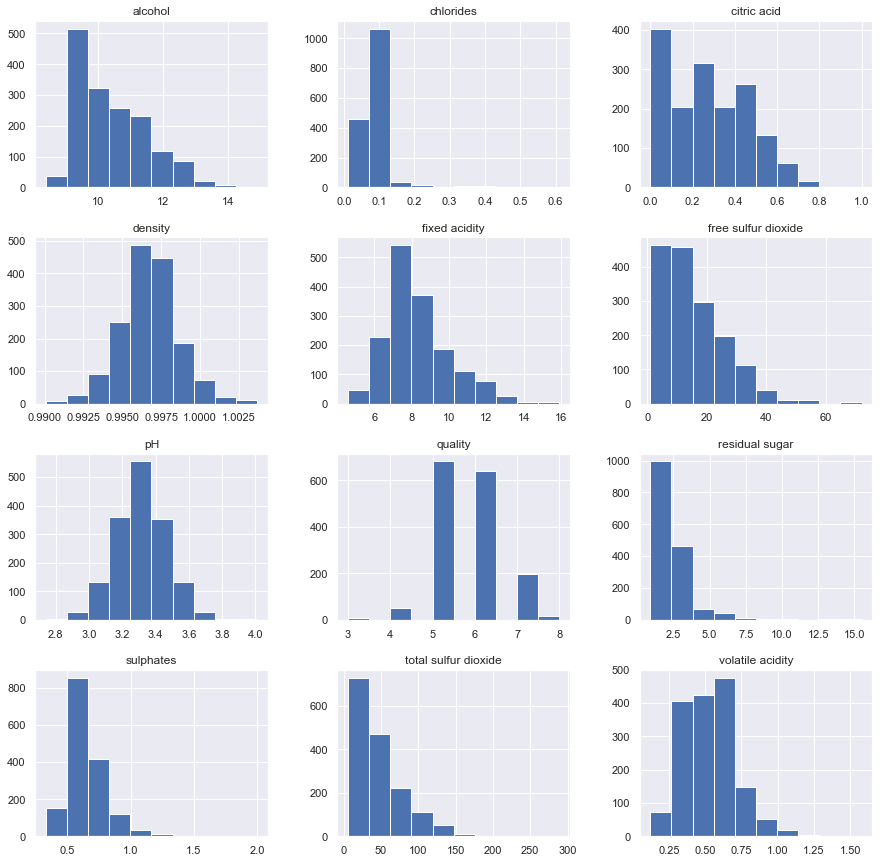

In [152]:
# смотрим распределение значений внутри каждого признака
sns.set()
wine_data.hist(figsize=(15,15))
plt.show()

В целом ничего интересного не показывает, кроме того что признак quality дискретный. Но это и так было известно.
Ок, попытаемся посмотреть попарную корреляцию между признаками:

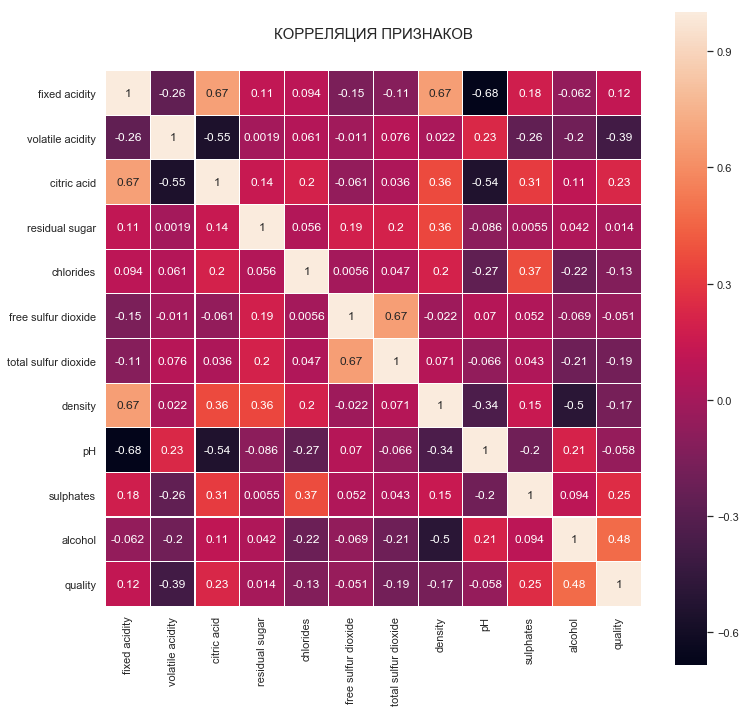

In [153]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('КОРРЕЛЯЦИЯ ПРИЗНАКОВ', y=1.05, size=15)
sns.heatmap(wine_data.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

Тут  интересные значения на признаках pH-fixed acidity, pH-citric acidity, alcohol-density

In [154]:
seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed)

In [158]:
# Задача многоклассовой классификации. Насколько помню из своих старых исследований,
# на многоклассовой классификации линейные алгоритмы показывают самую большую скорость
# работы и обучения, но точноть у них так себе
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

RF_clf = RandomForestClassifier(random_state=seed)
RF_clf.fit(X_train,y_train)
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('СV scores {}'.format(cv_scores))
print('СРЕДНЕЕ {}'.format(cv_scores.mean()))

pred_RF = RF_clf.predict(X_test)
accuracy_score(y_test, pred_RF)

D:\ML\ANACONDA\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


СV scores [0.64122137 0.68461538 0.66923077 0.66666667 0.6484375  0.72440945
 0.61417323 0.58267717 0.744      0.688     ]
СРЕДНЕЕ 0.6663431537078306


0.6625

Это точнее чем подбрасывать монетку. Результат на тестовой выборке показал чуть хуже, чем на обучающей и это нормально.

In [159]:
from sklearn.ensemble import ExtraTreesClassifier
ET_clf = ExtraTreesClassifier(random_state=seed)
ET_clf.fit(X_train,y_train)
cv_scores = cross_val_score(ET_clf,X_train, y_train, cv=10, scoring='accuracy')
print('СV scores  {}'.format(cv_scores))
print('СРЕДНЕЕ {}'.format(cv_scores.mean()))

pred_ET = ET_clf.predict(X_test)
accuracy_score(y_test, pred_ET)

D:\ML\ANACONDA\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


СV scores  [0.60305344 0.64615385 0.66923077 0.6744186  0.71875    0.68503937
 0.63779528 0.5984252  0.664      0.664     ]
СРЕДНЕЕ 0.6560866497669966


0.69375

Результат на тестовой выборке хуже примерно на 4%.  Вполне вероятно началось переобучение.
Из двух методов оба работают неважно, но  Случайный лес делает это немного точнее.
Сохраним обученную модель, чтобы потом её загрузить в Flask

In [162]:
import pickle
filename = 'RF_clf.sav'
pickle.dump(RF_clf, open(filename, 'wb'))

'''
а если вдруг решим проверить..
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
'''

"\nа если вдруг решим проверить..\nloaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\nprint(result)\n"

In [202]:
# А вот так будем собирать значение для передачи на классификацию непосредственно в Flask

d = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11]

df = pd.DataFrame({'fixed acidity':[d[0]],
                   'volatile acidity':[d[1]],
                   'citric acid':[d[2]],
                   'residual sugar':[d[3]],
                   'chlorides' :[d[4]],
                   'free sulfur dioxide':[d[5]],
                   'total sulfur dioxide':[d[6]],
                   'density':[d[7]],
                   'pH':[d[8]],
                   'sulphates':[d[9]],
                   'alcohol':[d[10]]
                  }
                 )

result = RF_clf.predict(df)
result[0]


<class 'pandas.core.frame.DataFrame'>


5